O PCA (Principal Component Analysis) é uma técnica que nos ajuda a simplificar dados complexos. Imagine que você tem um livro de 500 páginas e precisa resumir a ideia principal em apenas uma frase. Você leria o livro todo, entenderia os pontos mais importantes e formaria a sua frase. O PCA faz algo parecido com seus dados.

Ele pega um conjunto de dados com muitas "características" (ou dimensões) e encontra as "ideias principais" (os componentes principais). Assim, ele consegue representar seus dados com menos dimensões, sem perder muita informação.

Neste script, vamos usar um conjunto de dados simples de 2 dimensões para ver como o PCA funciona.

Passo 1: Visualizando os dados originais...


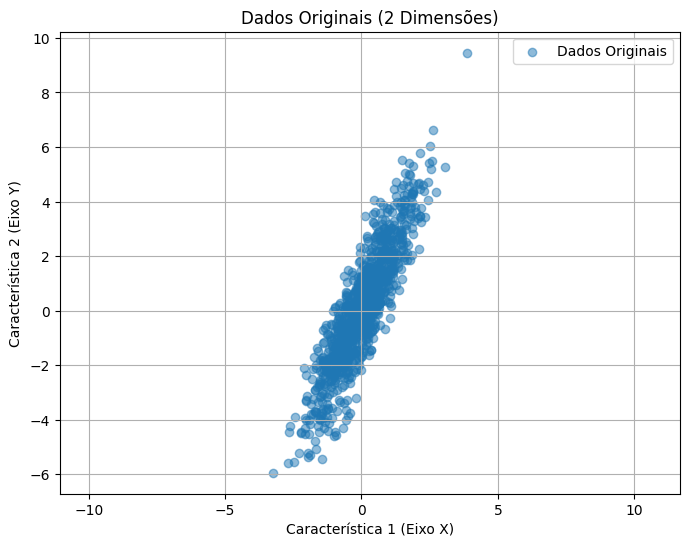


Podemos ver que os dados formam uma linha inclinada. O PCA irá encontrar o 'eixo principal' dessa linha.
Imagine que o 'eixo principal' é o caminho onde a variação dos dados é maior.

Passo 2: Aplicando o PCA...

Passo 3: Visualizando os novos eixos (componentes principais)...


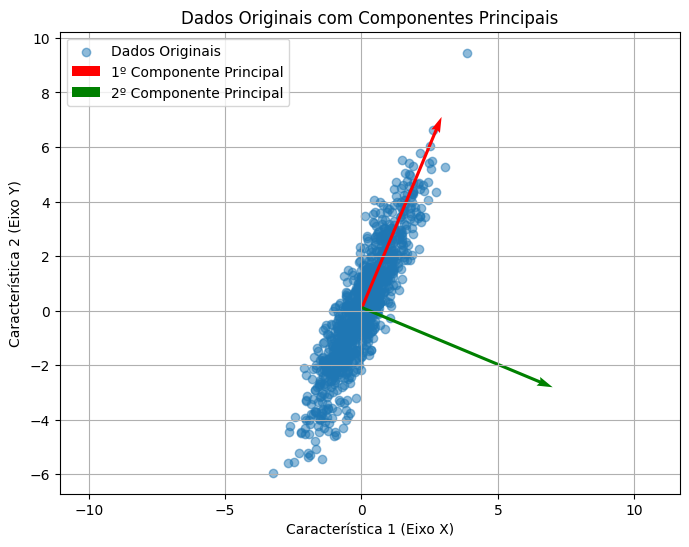


O eixo vermelho (1º componente) é o caminho onde a variação dos dados é maior.
O eixo verde (2º componente) é o segundo caminho mais importante, perpendicular ao primeiro.

Passo 4: Visualizando os dados transformados...


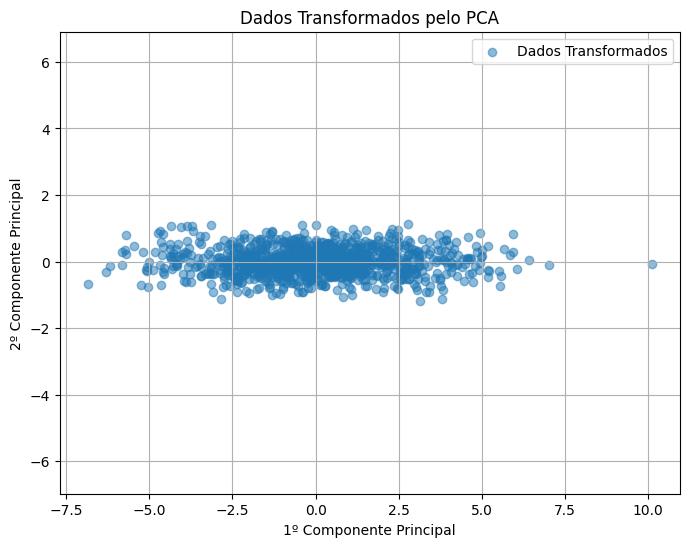


Note que os dados agora estão centrados em torno de (0,0) e a maior variação está no eixo X (o 1º Componente Principal).

Passo 5: Reduzindo a dimensionalidade para 1 dimensão...


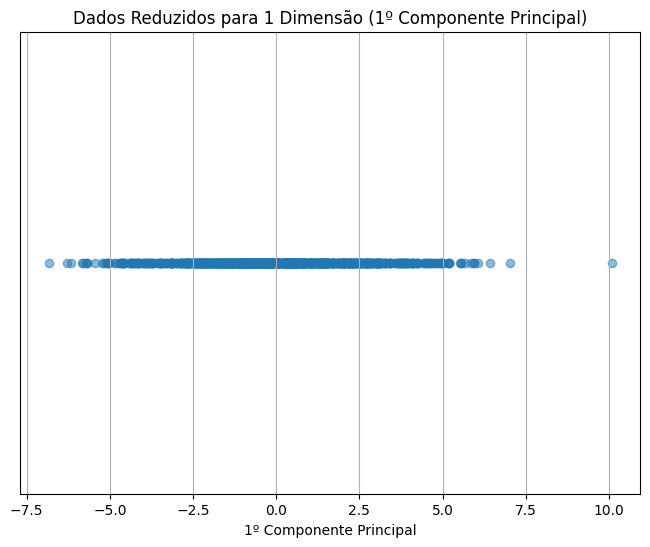


Este é o resumo do nosso conjunto de dados original. O PCA nos permitiu representar a informação mais importante em um único número, em vez de dois, sem perder a essência dos dados.


In [1]:
# =================================================================
# 1. Configuração e Criação do Conjunto de Dados
# =================================================================

# Importando as bibliotecas necessárias
# NumPy para trabalhar com números e arrays
import numpy as np
# Matplotlib para criar gráficos
import matplotlib.pyplot as plt
# PCA do Scikit-learn para fazer a mágica
from sklearn.decomposition import PCA

# Definindo um "nível de aleatoriedade" para que os resultados sejam sempre os mesmos
np.random.seed(42)

# Criando um conjunto de dados simples com 2 dimensões (X e Y)
# A dimensão X está correlacionada com a Y, o que significa que os pontos formam uma linha inclinada
# Vamos criar 1000 pontos de dados
x = np.random.normal(0, 1, 1000)
y = 2 * x + np.random.normal(0, 1, 1000)

# Juntando X e Y em um único conjunto de dados
data = np.vstack((x, y)).T

# =================================================================
# 2. Visualização dos Dados Originais
# =================================================================

print("Passo 1: Visualizando os dados originais...")

# Criando um gráfico para visualizar os dados originais
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, label='Dados Originais')
plt.title('Dados Originais (2 Dimensões)')
plt.xlabel('Característica 1 (Eixo X)')
plt.ylabel('Característica 2 (Eixo Y)')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()

print("\nPodemos ver que os dados formam uma linha inclinada. O PCA irá encontrar o 'eixo principal' dessa linha.")
print("Imagine que o 'eixo principal' é o caminho onde a variação dos dados é maior.")

# =================================================================
# 3. Executando o PCA
# =================================================================

print("\nPasso 2: Aplicando o PCA...")

# Criando uma instância do PCA. Vamos pedir 2 componentes principais para começar.
pca = PCA(n_components=2)

# O método "fit" calcula os componentes principais.
pca.fit(data)

# O método "transform" converte os dados originais para o novo sistema de eixos (os componentes principais).
data_pca = pca.transform(data)

# =================================================================
# 4. Visualizando os Componentes Principais
# =================================================================

print("\nPasso 3: Visualizando os novos eixos (componentes principais)...")

# Os componentes principais são os novos eixos do nosso sistema de coordenadas
componentes = pca.components_

# Criando um novo gráfico para visualizar os dados originais com os novos eixos
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, label='Dados Originais')
plt.title('Dados Originais com Componentes Principais')
plt.xlabel('Característica 1 (Eixo X)')
plt.ylabel('Característica 2 (Eixo Y)')

# Desenhando o primeiro componente principal (o eixo mais importante)
plt.quiver(
    pca.mean_[0], pca.mean_[1],  # Ponto de origem
    componentes[0, 0], componentes[0, 1], # Direção do vetor
    scale=3, color='red', width=0.005,
    label='1º Componente Principal'
)

# Desenhando o segundo componente principal (o segundo eixo mais importante)
plt.quiver(
    pca.mean_[0], pca.mean_[1],
    componentes[1, 0], componentes[1, 1],
    scale=3, color='green', width=0.005,
    label='2º Componente Principal'
)

plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()

print("\nO eixo vermelho (1º componente) é o caminho onde a variação dos dados é maior.")
print("O eixo verde (2º componente) é o segundo caminho mais importante, perpendicular ao primeiro.")

# =================================================================
# 5. Visualizando os Dados no Novo Sistema de Coordenadas
# =================================================================

print("\nPasso 4: Visualizando os dados transformados...")

# Plotando os dados no novo sistema de eixos
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.5, label='Dados Transformados')
plt.title('Dados Transformados pelo PCA')
plt.xlabel('1º Componente Principal')
plt.ylabel('2º Componente Principal')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()

print("\nNote que os dados agora estão centrados em torno de (0,0) e a maior variação está no eixo X (o 1º Componente Principal).")

# =================================================================
# 6. Redução de Dimensionalidade (O Poder do PCA!)
# =================================================================

print("\nPasso 5: Reduzindo a dimensionalidade para 1 dimensão...")

# Agora, vamos usar apenas o 1º componente principal para representar os dados.
# Isso significa que estamos transformando nossos dados de 2D para 1D!
data_pca_1d = data_pca[:, 0]

# Vamos plotar a variação dos dados no novo eixo
plt.figure(figsize=(8, 6))
plt.scatter(data_pca_1d, np.zeros_like(data_pca_1d), alpha=0.5)
plt.title('Dados Reduzidos para 1 Dimensão (1º Componente Principal)')
plt.xlabel('1º Componente Principal')
plt.yticks([]) # Removendo o eixo Y para enfatizar que agora é 1D
plt.grid(True)
plt.show()

print("\nEste é o resumo do nosso conjunto de dados original. O PCA nos permitiu representar a informação mais importante em um único número, em vez de dois, sem perder a essência dos dados.")